In [2]:
#importing all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_federated as tff
import tensorflow as tf


2024-04-07 20:49:33.915070: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-07 20:49:34.213175: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-07 20:49:34.213265: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-07 20:49:34.214591: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-07 20:49:34.344124: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-07 20:49:34.346944: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [3]:
benign=pd.read_csv('./archive/1.benign.csv')
gc= pd.read_csv('./archive/1.gafgyt.combo.csv')
gj=pd.read_csv('./archive/1.gafgyt.junk.csv')
gs=pd.read_csv('./archive/1.gafgyt.scan.csv')
gt=pd.read_csv('./archive/1.gafgyt.tcp.csv')
gu=pd.read_csv('./archive/1.gafgyt.udp.csv')
ma =pd.read_csv('./archive/1.mirai.ack.csv')
msc=pd.read_csv('./archive/1.mirai.scan.csv')
msy=pd.read_csv('./archive/1.mirai.syn.csv')
mu =pd.read_csv('./archive/1.mirai.udp.csv')
mup=pd.read_csv('./archive/1.mirai.udpplain.csv')

In [4]:
benign['type']='benign'
gc['type']='gafgyt.combo'
gj['type']='gafgyt.junk'
gs['type']='gafgyt.scan'
gt['type']='gafgyt.tcp'
gu['type']='gafgyt.udp'
ma['type']='mirai.ack'
msc['type']='mirai.scan'
msy['type']='mirai.syn'
mu['type']='mirai.udp'
mup['type']='mirai.udpplain'


In [5]:
df=pd.concat([benign,gc,gj,gs,gt,gu,ma,msc,msy,mu,mup],
sort=False,axis=0,ignore_index=True)

In [6]:
df["type"].value_counts()

mirai.udp         237665
mirai.syn         122573
mirai.scan        107685
gafgyt.udp        105874
mirai.ack         102195
gafgyt.tcp         92141
mirai.udpplain     81982
gafgyt.combo       59718
benign             49548
gafgyt.scan        29849
gafgyt.junk        29068
Name: type, dtype: int64

<Axes: title={'center': 'Class Distribution'}>

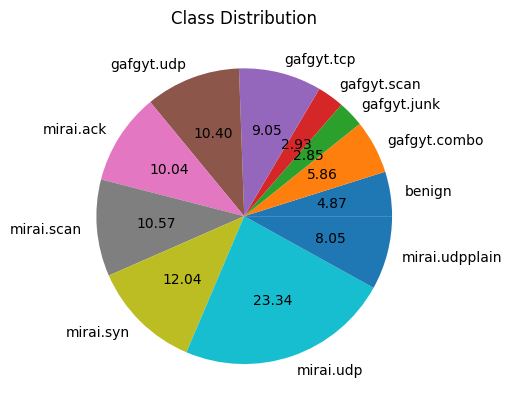

In [7]:
#plotting the data to get rough idea about it
plt.title("Class Distribution")
df.groupby("type").size().plot(kind='pie', autopct='%.2f')

In [8]:
df


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,benign
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,0.0,0.0,5.319895,344.262695,4.710446,344.262695,2.218830e+01,0.0,0.0,benign
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,0.0,0.0,6.318264,347.703087,9.034660,347.703087,8.162508e+01,0.0,0.0,benign
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.0,0.0,1.000000,337.000000,0.000000,337.000000,0.000000e+00,0.0,0.0,benign
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018293,105.769355,351.445104,59033.632714,179.698484,332.392768,60364.207322,519.025485,327.978538,60568.830128,5025.952792,...,0.0,0.0,23441.691874,554.000000,0.000031,554.000000,9.313226e-10,0.0,0.0,mirai.udpplain
1018294,106.767520,353.342263,58861.394701,180.696613,333.619173,60300.419617,520.023684,328.413174,60550.405264,5026.951047,...,0.0,0.0,23442.691060,554.000000,0.000031,554.000000,9.313226e-10,0.0,0.0,mirai.udpplain
1018295,107.341380,355.211604,58684.641197,181.263540,334.834977,60234.214077,520.607907,328.846489,60531.660371,5027.548981,...,0.0,0.0,23443.503554,554.000000,0.000032,554.000000,1.047738e-09,0.0,0.0,mirai.udpplain
1018296,107.626489,357.058626,58503.134010,181.538246,336.042243,60165.548121,520.912605,329.278718,60512.588315,5027.877118,...,0.0,0.0,23444.190245,554.000000,0.000030,554.000000,8.731149e-10,0.0,0.0,mirai.udpplain


In [9]:
#assigning client ids to every client
import random

num_client = 10

df["client"] = ["client_{}".format(random.randint(1, num_client)) for _ in range(df.shape[0])]

In [10]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["type"])

In [11]:
#removing type and client from df to get features 
features = list(train_df.columns)
features.remove("type")
features.remove("client")
# features

In [12]:
#encoding 'type' into numerical values
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df["type"] = label_encoder.fit_transform(train_df["type"])
test_df["type"] = label_encoder.transform(test_df["type"])

In [13]:
#scaling the features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])

In [14]:
train_df[features] = train_df[features].astype("float32")
test_df[features] = test_df[features].astype("float32")

train_df["type"] = train_df["type"].astype("int32")
test_df["type"] = test_df["type"].astype("int32")

In [15]:
import nest_asyncio
nest_asyncio.apply()

In [16]:
%load_ext tensorboard

In [17]:
#splitting client ids in train and test dataset
client_id_colname = 'client' 

client_ids = df[client_id_colname].unique()

train_client_ids = pd.DataFrame(client_ids).sample(frac=0.8).values.ravel().tolist()
test_client_ids = [x for x in client_ids if x not in train_client_ids]

In [18]:
train_client_ids

['client_7',
 'client_4',
 'client_6',
 'client_9',
 'client_2',
 'client_5',
 'client_3',
 'client_8']

In [19]:
test_client_ids


['client_1', 'client_10']

In [20]:
#creating a TensorFlow Dataset object for a specific client ID. 
from collections import OrderedDict
from tensorflow.keras.utils import to_categorical

NUM_EPOCHS = 1
SHUFFLE_BUFFER = 100
PREFETCH_BUFFER = 5

def create_tf_dataset_for_client_fn(client_id):
    client_data = dataframe[dataframe[client_id_colname] == client_id]
    client_data_dict = OrderedDict()
    client_data_dict["features"] = np.array(client_data[features].values, dtype="float32")
    client_data_dict["label"] = np.array(client_data["type"].values, dtype="int32")

    dataset = tf.data.Dataset.from_tensor_slices(client_data_dict)
    dataset = dataset.shuffle(SHUFFLE_BUFFER).batch(1).repeat(NUM_EPOCHS)
    return dataset

In [21]:
dataframe = train_df
train_data = tff.simulation.datasets.ClientData.from_clients_and_tf_fn(
    client_ids=train_client_ids,
    serializable_dataset_fn=create_tf_dataset_for_client_fn)

dataframe = test_df
test_data = tff.simulation.datasets.ClientData.from_clients_and_tf_fn(
    client_ids=test_client_ids,
    serializable_dataset_fn=create_tf_dataset_for_client_fn)

In [22]:
train_data.element_type_structure

OrderedDict([('features',
              TensorSpec(shape=(None, 115), dtype=tf.float32, name=None)),
             ('label', TensorSpec(shape=(None,), dtype=tf.int32, name=None))])

In [23]:
test_data.element_type_structure

OrderedDict([('features',
              TensorSpec(shape=(None, 115), dtype=tf.float32, name=None)),
             ('label', TensorSpec(shape=(None,), dtype=tf.int32, name=None))])

In [24]:
example_dataset = train_data.create_tf_dataset_for_client(train_data.client_ids[0])

example_element = next(iter(example_dataset))

example_element['label'].numpy()

array([6], dtype=int32)

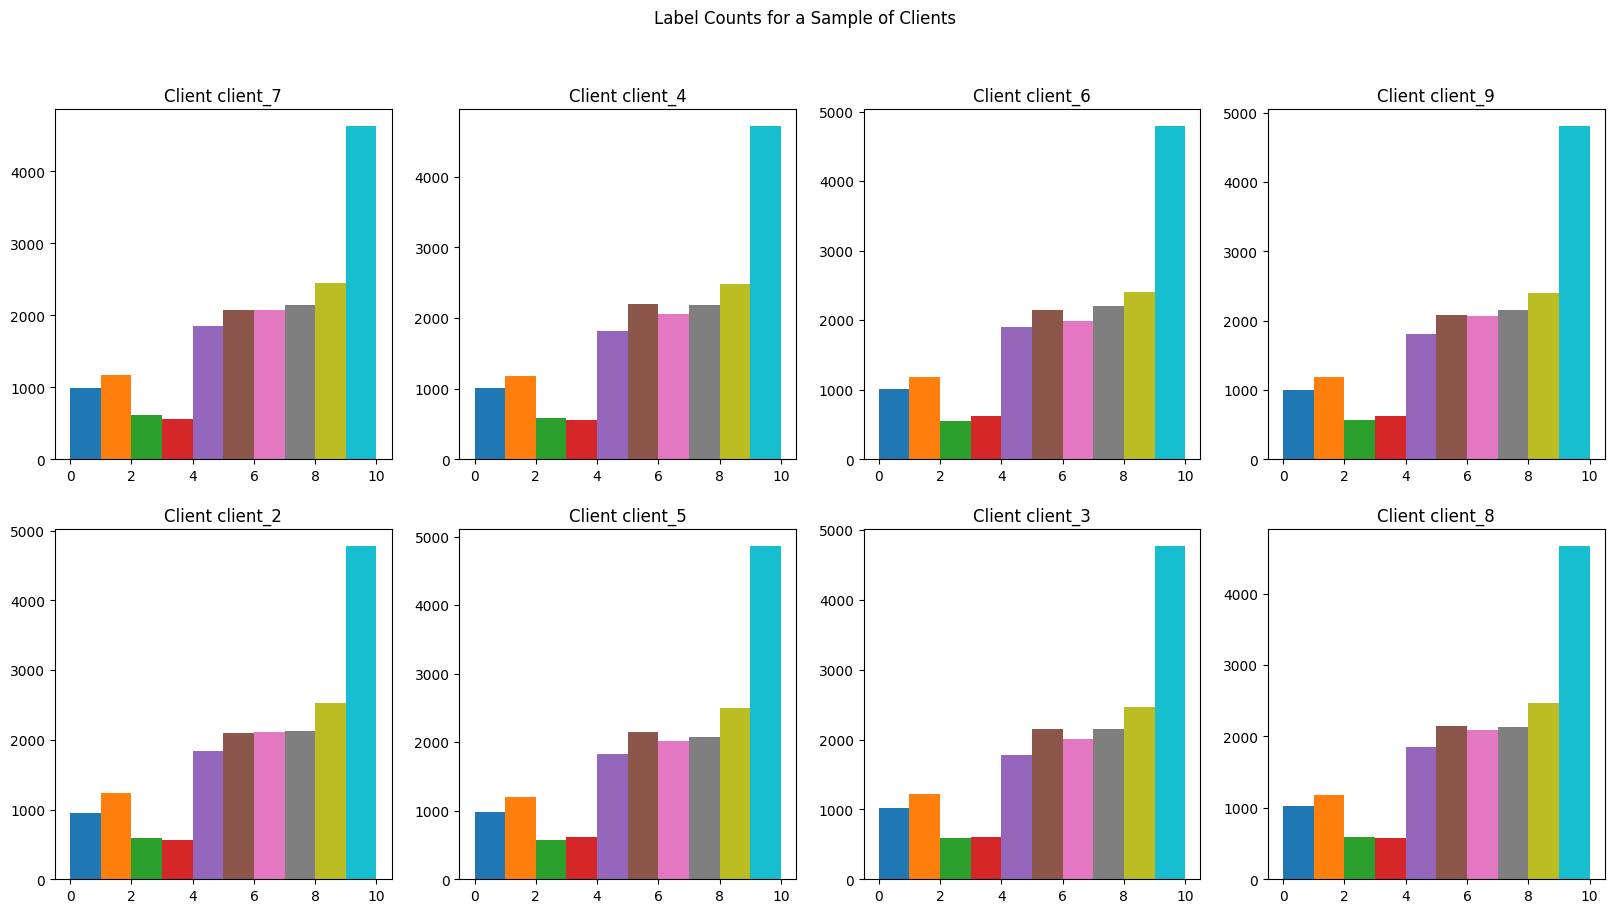

In [25]:
from collections import defaultdict

f = plt.figure(figsize=(20, 10))
f.suptitle('Label Counts for a Sample of Clients')
for i, c_ids in enumerate(train_data.client_ids):
    client_dataset = train_data.create_tf_dataset_for_client(c_ids)
    plot_data = defaultdict(list)
    for example in client_dataset:
        label = example['label'].numpy()[0]
        plot_data[label].append(label)
    plt.subplot(2, 4, i+1)
    plt.title('Client {}'.format(c_ids))
    for j in range(10):
        plt.hist(plot_data[j], density=False, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [49]:
import collections

NUM_EPOCHS = 5
BATCH_SIZE = 64
SHUFFLE_BUFFER = 100
PREFETCH_BUFFER = 10

def preprocess(dataset):
    def batch_format_fn(element):
        return collections.OrderedDict(x=tf.reshape(element['features'], [-1, len(features)]),
                                       y=tf.reshape(element['label'], [-1, 1]))
    
    return dataset.repeat(NUM_EPOCHS).shuffle(SHUFFLE_BUFFER, seed=1).batch(
      BATCH_SIZE).map(batch_format_fn).prefetch(PREFETCH_BUFFER)

In [50]:
#an example of preprocessed dataset
preprocessed_example_dataset = preprocess(example_dataset)

sample_batch = tf.nest.map_structure(lambda x: x.numpy(),
                                     next(iter(preprocessed_example_dataset)))

sample_batch

OrderedDict([('x',
              array([[0.0000000e+00, 8.3266727e-17, 0.0000000e+00, ..., 0.0000000e+00,
                      7.3921997e-03, 2.6120007e-01],
                     [3.6073065e-01, 4.2137146e-01, 2.9204398e-01, ..., 0.0000000e+00,
                      7.3921997e-03, 2.6120007e-01],
                     [2.8751493e-01, 4.9652416e-01, 1.9766054e-01, ..., 0.0000000e+00,
                      7.3921997e-03, 2.6120007e-01],
                     ...,
                     [0.0000000e+00, 8.3266727e-17, 0.0000000e+00, ..., 0.0000000e+00,
                      7.3921997e-03, 2.6120007e-01],
                     [2.9334667e-01, 3.0121446e-01, 3.5083136e-01, ..., 0.0000000e+00,
                      7.3921997e-03, 2.6120007e-01],
                     [4.1948566e-01, 1.7009512e-02, 7.4479735e-06, ..., 0.0000000e+00,
                      7.3921997e-03, 2.6120007e-01]], dtype=float32)),
             ('y',
              array([[ 4],
                     [ 9],
                     [ 9

In [51]:
from tqdm import tqdm

def make_federated_data(client_data, client_ids):
    return [preprocess(client_data.create_tf_dataset_for_client(x)) for x in tqdm(client_ids)]

In [52]:
#making federated data for a sample client
NUM_CLIENTS = len(np.unique(train_df[client_id_colname]))

sample_clients = train_data.client_ids[0:NUM_CLIENTS]

federated_train_data = make_federated_data(train_data, sample_clients)

print('Number of client datasets: {l}'.format(l=len(federated_train_data)))
print('First dataset: {d}'.format(d=federated_train_data[0]))

100%|██████████| 8/8 [00:01<00:00,  5.90it/s]

Number of client datasets: 8
First dataset: <_PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 115), dtype=tf.float32, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))])>


In [3]:
#creating a keras model
def create_keras_model():
    input_shape = (len(features))
    num_classes = len(label_encoder.classes_)  
    clf = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(64, input_dim=input_shape, activation='relu'),
            tf.keras.layers.Dense(32,activation='relu'?),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dropout(0.2),#to prevent overfitting
            tf.keras.layers.Dense(num_classes, activation='softmax')
        ])
    return clf

keras_model = create_keras_model()
keras_model.summary()

SyntaxError: invalid syntax (1482842558.py, line 8)

In [54]:
import keras.backend as K

class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='F1-Score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.f1_score = self.add_weight(name='f1_score', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        true_positives = tf.math.reduce_sum(tf.math.round(tf.clip_by_value(y_true * y_pred, 0, 1)))                
        
        possible_positives = tf.math.reduce_sum(tf.math.round(tf.clip_by_value(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())   
        
        predicted_positives = tf.math.reduce_sum(tf.math.round(tf.clip_by_value(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
                
        self.f1_score.assign(2*((precision*recall)/(precision+recall+K.epsilon())))
        
    def result(self):
        return self.f1_score

    def reset_states(self):
        self.f1_score.assign(0.0)

In [55]:
from keras.metrics import Recall, Precision

def model_fn():
    keras_model = create_keras_model()
    return tff.learning.models.from_keras_model(
        keras_model,
        input_spec=preprocessed_example_dataset.element_spec,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [56]:
#creating an iterative process 
iterative_process = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.02),
    server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1.0))

In [57]:
str(iterative_process.initialize.type_signature)

'( -> <global_model_weights=<trainable=<float32[115,64],float32[64],float32[64,32],float32[32],float32[32,11],float32[11]>,non_trainable=<>>,distributor=<>,client_work=<>,aggregator=<value_sum_process=<>,weight_sum_process=<>>,finalizer=<int64,float32[115,64],float32[64],float32[64,32],float32[32],float32[32,11],float32[11]>>@SERVER)'

In [58]:
state = iterative_process.initialize()


2024-04-07 21:13:27.312495: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-04-07 21:13:27.312668: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-04-07 21:13:27.377327: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-04-07 21:13:27.377626: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session


In [59]:
state, metrics = iterative_process.next(state, federated_train_data)
print('round  1, metrics={}'.format(metrics))

2024-04-07 21:13:28.160392: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-04-07 21:13:28.160566: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-04-07 21:13:28.376810: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-04-07 21:13:28.376971: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-04-07 21:13:28.392651: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-04-07 21:13:28.392828: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-04-07 21:13:28.414011: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-04-07 21:13:28.414206: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session


round  1, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('sparse_categorical_accuracy', 0.74330753), ('loss', 0.53370196), ('num_examples', 4078125), ('num_batches', 63724)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])


In [60]:
#monitoring the model on  a client
NUM_ROUNDS = 11
for round_num in range(2, NUM_ROUNDS):
    state, metrics = iterative_process.next(state, federated_train_data)
    print('round {:2d}, metrics={}'.format(round_num, metrics))

round  2, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('sparse_categorical_accuracy', 0.81743425), ('loss', 0.33260334), ('num_examples', 4078125), ('num_batches', 63724)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
round  3, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('sparse_categorical_accuracy', 0.8421608), ('loss', 0.28692958), ('num_examples', 4078125), ('num_batches', 63724)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
round  4, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('sparse_categorical_accuracy', 0.85703725), ('loss', 0.2540254), ('num_examples', 4078125), ('num_batches', 63724)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weigh

In [61]:
#creating directories for training and testing logs
import os
train_logdir = "training/"
os.makedirs(train_logdir, exist_ok=True)

test_logdir = "testing/"
os.makedirs(test_logdir, exist_ok=True)

In [62]:
ModelVariables = collections.namedtuple('ModelVariables', 'weights bias num_examples loss_sum accuracy_sum')

In [63]:
def create_model_variables():
    return ModelVariables(
        weights=tf.Variable(
            lambda: tf.zeros(dtype=tf.float32, shape=(len(features), len(label_encoder.classes_))),
            name='weights',
            trainable=True),
        bias=tf.Variable(
            lambda: tf.zeros(dtype=tf.float32, shape=(len(label_encoder.classes_))),
            name='bias',
            trainable=True),
        num_examples=tf.Variable(0.0, name='num_examples', trainable=False),
        loss_sum=tf.Variable(0.0, name='loss_sum', trainable=False),
        accuracy_sum=tf.Variable(0.0, name='accuracy_sum', trainable=False))

In [64]:
def predict_on_batch(variables, x):
    return tf.nn.softmax(tf.matmul(x, variables.weights) + variables.bias)

def model_forward_pass(variables, batch):
    y = predict_on_batch(variables, batch['x'])
    predictions = tf.cast(tf.argmax(y, 1), tf.int32)
    
    flat_labels = tf.reshape(batch['y'], [-1])
    loss = -tf.reduce_mean(tf.reduce_sum(tf.one_hot(flat_labels, len(label_encoder.classes_)) * tf.math.log(y), axis=[1]))
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, flat_labels), tf.float32))
    num_examples = tf.cast(tf.size(batch['y']), tf.float32)
    variables.num_examples.assign_add(num_examples)
    variables.loss_sum.assign_add(loss * num_examples)
    variables.accuracy_sum.assign_add(accuracy * num_examples)
    return loss, predictions

In [65]:
def get_local_model_metrics(variables):
    return collections.OrderedDict(
        num_examples=variables.num_examples,
        loss=variables.loss_sum / variables.num_examples,
        accuracy=variables.accuracy_sum / variables.num_examples)

In [66]:
@tff.federated_computation
def aggregate_model_metrics_across_clients(metrics):
    return collections.OrderedDict(
        num_examples=tff.federated_sum(metrics.num_examples),
        loss=tff.federated_mean(metrics.loss, metrics.num_examples),
        accuracy=tff.federated_mean(metrics.accuracy, metrics.num_examples))
  

In [67]:
from typing import Callable, List, OrderedDict

class IOTModel(tff.learning.models.VariableModel):
    def __init__(self):
        self._variables = create_model_variables()
    @property
    def trainable_variables(self):
        return [self._variables.weights, self._variables.bias]

    @property
    def non_trainable_variables(self):
        return []

    @property
    def local_variables(self):
        return [
            self._variables.num_examples, self._variables.loss_sum,
            self._variables.accuracy_sum
        ]

    @property
    def input_spec(self):
        return OrderedDict(
            x=tf.TensorSpec([None, len(features)], tf.float32),
            y=tf.TensorSpec([None, 1], tf.int32))
    
    @tf.function
    def predict_on_batch(self, x, training=True):
        del training
        return predict_on_batch(self._variables, x)
    
    @tf.function
    def forward_pass(self, batch, training=True):
        del training
        loss, predictions = model_forward_pass(self._variables, batch)
        num_exmaples = tf.shape(batch['x'])[0]
        return tff.learning.models.BatchOutput(loss=loss, predictions=predictions, num_examples=num_exmaples)

    @tf.function
    def report_local_outputs(self):
        return get_local_model_metrics(self._variables)

    @property
    def federated_output_computation(self):
        return aggregate_model_metrics_across_clients

    @tf.function
    def report_local_unfinalized_metrics(self) -> OrderedDict[str, List[tf.Tensor]]:
        """Creates an `OrderedDict` of metric names to unfinalized values."""
        return collections.OrderedDict(
            num_examples=[self._variables.num_examples],
            loss=[self._variables.loss_sum, self._variables.num_examples],
            accuracy=[self._variables.accuracy_sum, self._variables.num_examples])
    
    def metric_finalizers(self) -> OrderedDict[str, Callable[[List[tf.Tensor]], tf.Tensor]]:
        """Creates an `OrderedDict` of metric names to finalizers."""
        return collections.OrderedDict(
            num_examples=tf.function(func=lambda x: x[0]),
            loss=tf.function(func=lambda x: x[0] / x[1]),
            accuracy=tf.function(func=lambda x: x[0] / x[1]))
    @tf.function
    def reset_metrics(self):
        for var in self.local_variables:
            var.assign(tf.zeros_like(var))

In [68]:
iterative_process = tff.learning.algorithms.build_weighted_fed_avg(
    IOTModel,
    client_optimizer_fn=lambda: tf.keras.optimizers.Adam(learning_rate=0.001))

In [69]:
state = iterative_process.initialize()

In [70]:
state, metrics = iterative_process.next(state, federated_train_data)
print('round  1, metrics={}'.format(metrics))

2024-04-07 21:21:33.309282: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-04-07 21:21:33.309457: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-04-07 21:21:33.440592: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-04-07 21:21:33.440777: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-04-07 21:21:33.458648: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-04-07 21:21:33.458837: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-04-07 21:21:33.484039: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-04-07 21:21:33.484270: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session


round  1, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('num_examples', 4078125.0), ('loss', 0.59314513), ('accuracy', 0.7431805)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])


In [71]:
for round_num in range(2, 11):
    state, metrics = iterative_process.next(state, federated_train_data)
    print('round {:2d}, metrics={}'.format(round_num, metrics))

round  2, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('num_examples', 4078125.0), ('loss', nan), ('accuracy', 0.2887891)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 1)]))])
round  3, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('num_examples', 4078125.0), ('loss', nan), ('accuracy', 0.28506312)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 1)]))])
round  4, metrics=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('num_examples', 4078125.0), ('loss', nan), ('accuracy', 0.28473133)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 1)]))])
round  5, metrics=OrderedDict([('distributor', ()), ('client_work', Ordere

In [78]:
evaluation = tff.learning.algorithms.build_fed_eval(IOTModel)

In [73]:
str(evaluation.type_signature)

'(<server_model_weights=<trainable=<float32[115,11],float32[11]>,non_trainable=<>>@SERVER,federated_dataset={<x=float32[?,115],y=int32[?,1]>*}@CLIENTS> -> <eval=<num_examples=float32,loss=float32,accuracy=float32>>@SERVER)'

In [75]:
NUM_CLIENTS = len(np.unique(test_df[client_id_colname]))

sample_clients = test_data.client_ids[0:NUM_CLIENTS]

federated_test_data = make_federated_data(test_data, sample_clients)

len(federated_test_data), federated_test_data[0]

100%|██████████| 2/2 [00:00<00:00,  4.91it/s]


(2,
 <_PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 115), dtype=tf.float32, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))])>)

In [79]:
evaluation_state = evaluation.initialize()
model_weights = iterative_process.get_model_weights(state)
evaluation_state = evaluation.set_model_weights(evaluation_state, model_weights)

2024-04-07 21:32:22.206245: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-04-07 21:32:22.206667: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-04-07 21:32:22.264368: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-04-07 21:32:22.264732: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-04-07 21:32:22.408288: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-04-07 21:32:22.408648: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-04-07 21:32:22.496473: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-04-07 21:32:22.496760: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session


In [82]:
evaluation_output = evaluation.next(evaluation_state, federated_train_data)

2024-04-07 21:32:55.373078: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-04-07 21:32:55.373356: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-04-07 21:32:55.476855: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-04-07 21:32:55.477177: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-04-07 21:32:55.499622: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-04-07 21:32:55.499898: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-04-07 21:32:55.530630: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-04-07 21:32:55.530989: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session


In [84]:
federated_test_data = make_federated_data(test_data, sample_clients)

len(federated_test_data), federated_test_data[0]

100%|██████████| 2/2 [00:00<00:00,  3.96it/s]


(2,
 <_PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 115), dtype=tf.float32, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))])>)

In [85]:
str(evaluation_output.metrics)

"OrderedDict([('distributor', ()), ('client_work', OrderedDict([('eval', OrderedDict([('current_round_metrics', OrderedDict([('num_examples', 4078125.0), ('loss', 0.42766514), ('accuracy', 0.7808981)])), ('total_rounds_metrics', OrderedDict([('num_examples', 4078125.0), ('loss', 0.42766514), ('accuracy', 0.7808981)]))]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', ())])"